# Credit Risk Modelling: Loan Approval Prediction

## Project Overview
The objective of this project is to build a credit risk model that predicts whether a loan application should be approved or rejected based on applicant demographic and financial information. The project follows an end-to-end credit risk modelling workflow, including data preprocessing, exploratory data analysis, feature engineering, model development, and business-oriented evaluation.


#### Dataset Source and Loading

The dataset used in this project was sourced from Kaggle and downloaded programmatically using the `kagglehub` library. This approach ensures reproducibility and avoids manual file handling. At this stage, the data is retrieved in its raw form without any preprocessing, serving as the starting point for subsequent data cleaning and analysis.


In [341]:
import kagglehub

path = kagglehub.dataset_download("architsharma01/loan-approval-prediction-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/loan-approval-prediction-dataset


#### Libraries and Tools

This project uses standard data science and machine learning libraries for data analysis and modeling. NumPy and Pandas are used for numerical computation and data manipulation, while Seaborn and Matplotlib support exploratory data analysis through visualization. Scikit-learn provides tools for data preprocessing, model training, and evaluation. Logistic Regression is used as an interpretable baseline credit risk model, and a Decision Tree classifier is included for comparison with a non-linear approach.


In [342]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score
from sklearn.tree import DecisionTreeClassifier

#### Data Loading

The loan approval dataset is loaded from a CSV file into a Pandas DataFrame. 

In [343]:
df=pd.read_csv("/kaggle/input/loan-approval-prediction-dataset/loan_approval_dataset.csv")

## Data Preprocessing

#### Initial Data Inspection

The first 5 rows of the dataset are displayed to understand the structure and contents of the data. 


In [344]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


#### Column Name Cleaning

Column names were cleaned by removing leading and trailing whitespace. This prevents potential issues during feature selection and transformation.


In [345]:
df.columns=df.columns.str.strip()
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

#### Dataset Dimensions

The dataset consists of 4,269 loan applications(Rows) and 13 features(Columns). 


In [346]:
df.shape

(4269, 13)

#### Missing Value Analysis

A missing value check was performed across all features to assess data quality.


In [347]:
df.isnull().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

### Categorical Variable Encoding

In [348]:
df["loan_status"].unique()

array([' Approved', ' Rejected'], dtype=object)

In [349]:
df["loan_status"]=df["loan_status"].map({" Approved":1," Rejected":0})


The categorical target variable `loan_status` was converted into a binary numerical format, where approved applicants were encoded as 1 and rejected applicants as 0.

In [350]:
df["self_employed"].unique()

array([' No', ' Yes'], dtype=object)

In [351]:
df["self_employed"]=df["self_employed"].map({" No":0," Yes":1})


The categorical variable `self_employed` was converted into a binary numerical format, where self-employed applicants were encoded as 1 and non–self-employed applicants as 0.

In [352]:
df["education"].unique()

array([' Graduate', ' Not Graduate'], dtype=object)

In [353]:
df["education"]=df["education"].map({" Graduate":1," Not Graduate":0})


The categorical variable `education` was converted into a binary numerical format, where graduated applicants were encoded as 1 and not graduated applicants as 0.

#### Target Variable Distribution

The distribution of loan approvals and rejections was examined to understand how often each decision occurs in the dataset. In real lending scenarios, approvals usually outnumber rejections, which can influence how a model behaves. If this imbalance is ignored, a model may appear accurate while still making risky approval decisions. Analyzing this distribution helps ensure that the model focuses on identifying risky applicants rather than simply approving most loans.


In [354]:
df['loan_status'].value_counts(normalize=True)


loan_status
1    0.62216
0    0.37784
Name: proportion, dtype: float64

#### Feature Engineering: Loan-to-Income Ratio

A new feature loan-to-income ratio is calculated and added to the dataset by dividing the loan amount by the applicant’s annual income. This feature reflects the financial burden of the loan relative to earning capacity. Higher values generally indicate increased repayment risk.


In [355]:
df['loan_to_income'] = df['loan_amount'] / df['income_annum']

#### Preprocessing Verification

In [356]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,loan_to_income
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1,3.114583
1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0,2.975610
2,3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,3.263736
3,4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,3.743902
4,5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0,2.469388


## Exploratory Data Analysis

#### Credit Score vs Loan Approval

From the below box plot we can clearly see that approved applicants have significantly higher credit scores, while rejected applicants tend to have lower scores. This clear separation confirms that credit score is a strong indicator of loan approval and plays a critical role in assessing applicant risk.


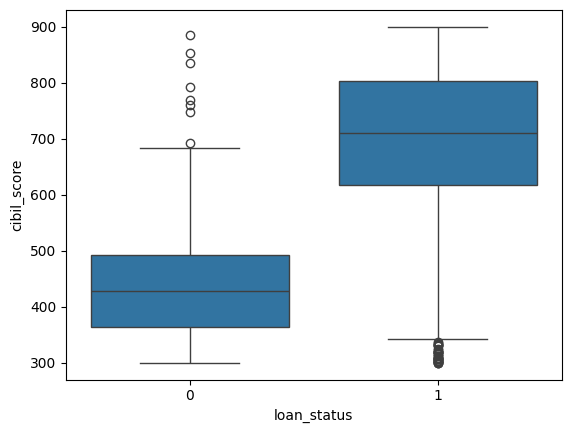

In [357]:
sns.boxplot(x='loan_status',y='cibil_score',data=df)
plt.show()

#### Loan-to-Income Ratio vs Loan Status

The box plot shows significant overlap between approved and rejected loan applications, with approved loans having a slightly higher average loan-to-income ratio. This indicates that the loan-to-income ratio alone is not a decisive factor in approval decisions and should be evaluated alongside other variables such as credit score and income.



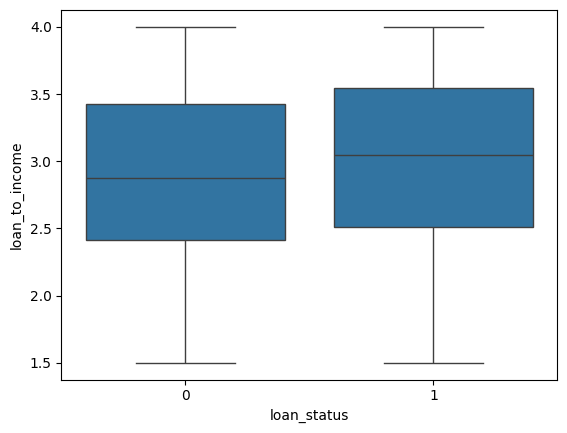

In [358]:
sns.boxplot(x='loan_status',y='loan_to_income',data=df)
plt.show()

#### Loan Amount vs Loan Status

The box plot shows substantial overlap in loan amounts between approved and rejected applications, with very similar median values across both groups. This indicates that loan amount alone is not a strong determinant of approval decisions and is likely evaluated in combination with other factors such as income, credit score, and repayment capacity.


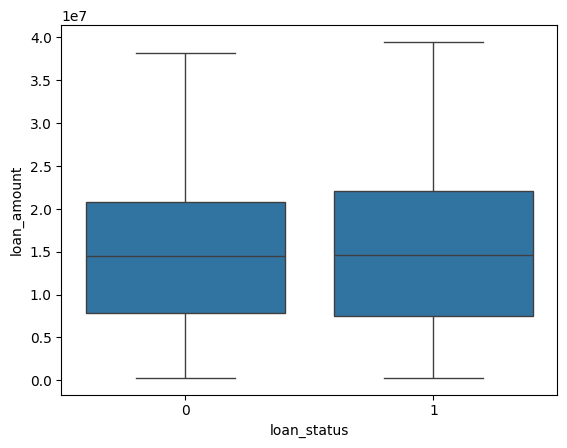

In [359]:
sns.boxplot(x='loan_status',y='loan_amount',data=df)
plt.show()

#### Annual Income vs Loan Status

The box plot shows significant overlap in annual income between approved and rejected loan applications, with similar median income levels across both groups. This suggests that income alone does not determine loan approval decisions and is evaluated alongside other factors such as credit score, loan amount, and overall risk profile.


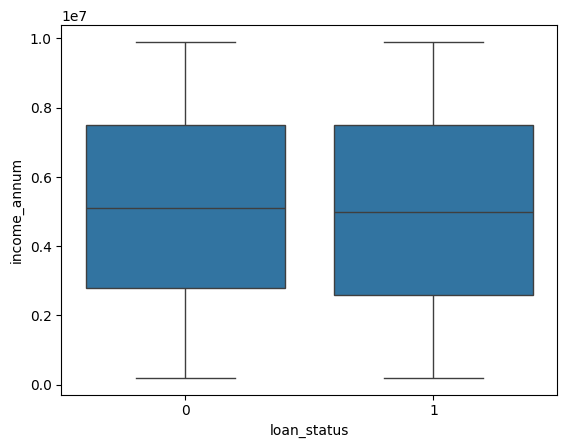

In [360]:
sns.boxplot(x='loan_status', y='income_annum', data=df)
plt.show()

#### Loan Term vs Loan Status

The box plot suggests that loan approval decisions are not strongly dependent on loan term alone, as there is significant overlap between approved and rejected applications. However, rejected applications tend to be more concentrated around longer loan durations. Longer loan terms can increase repayment uncertainty and overall risk, which may influence lending decisions. Overall, loan term appears to play a supporting role rather than a decisive role in loan approval.



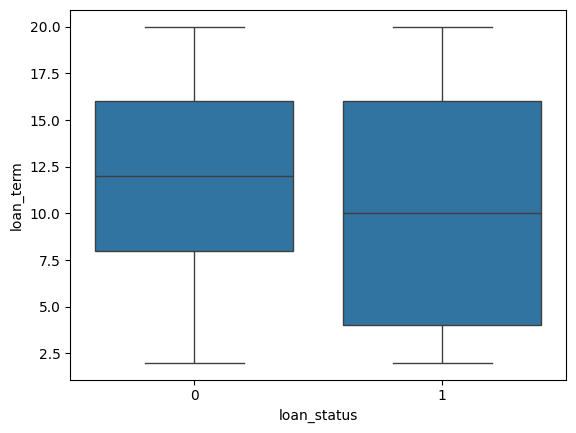

In [361]:
sns.boxplot(x='loan_status', y='loan_term', data=df)
plt.show()

## Getting training and test sets ready

#### Feature and Target Separation

The dataset was divided into input features and a target variable. All predictive features were stored separately, while the loan approval status was used as the target. The loan id was excluded, as it does not contain meaningful information for prediction and could negatively impact model performance.


In [362]:
x=df.drop(columns=["loan_id","loan_status"])
y=df["loan_status"]

In [363]:
x.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_to_income
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,3.114583
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,2.975610
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,3.263736
3,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,3.743902
4,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,2.469388


In [364]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

#### Feature Scaling

Feature scaling was applied using standardization to ensure all input variables are on a comparable scale. This step is important because many machine learning algorithms are sensitive to differences in feature magnitude. Standardization helps improve model stability and ensures that no single feature disproportionately influences the model.


In [365]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [366]:
type(x_scaled),type(y)

(numpy.ndarray, pandas.core.series.Series)

#### Train–Test Split

The dataset was divided into training and testing sets to evaluate model performance on unseen data. Eighty percent of the data was used for training, while twenty percent was reserved for testing. Stratified sampling was applied to maintain the original proportion of approved and rejected loans in both sets, ensuring a fair and reliable evaluation.


In [367]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42,stratify=y)

## Model 1: Logistic regression

#### Logistic Regression Model Training

A logistic regression model was trained using the training dataset. Logistic regression is widely used in credit risk modeling due to its simplicity, interpretability, and ability to estimate probabilities. This model serves as a baseline to evaluate how well applicant features can predict loan approval outcomes.


In [368]:
model_0=LogisticRegression()
model_0.fit(x_train,y_train)


LogisticRegression()

#### Model Predictions

The trained model was used to generate predictions on the test dataset. Since the test data was not used during training, these predictions provide an unbiased assessment of how well the model can generalize to new loan applications.


In [369]:
y_pred=model_0.predict(x_test)

### Model Evaluation: Confusion Matrix

The confusion matrix breaks down the model’s predictions into four categories:

- **True Negatives (TN):** Loan applications that were correctly predicted as rejected. These represent high-risk applicants that the model successfully identified.
- **False Positives (FP):** Loan applications that were predicted as approved but were actually rejected. This is a critical error in credit risk, as it represents approving potentially risky applicants.
- **False Negatives (FN):** Loan applications that were predicted as rejected but were actually approved. While this does not cause direct financial loss, it can result in missed business opportunities.
- **True Positives (TP):** Loan applications that were correctly predicted as approved, indicating that the model accurately identified creditworthy applicants.

This detailed breakdown helps assess not only overall model accuracy but also the financial and business impact of different types of prediction errors.


In [370]:
cm_0=confusion_matrix(y_test,y_pred)
cm_0

array([[280,  43],
       [ 31, 500]])

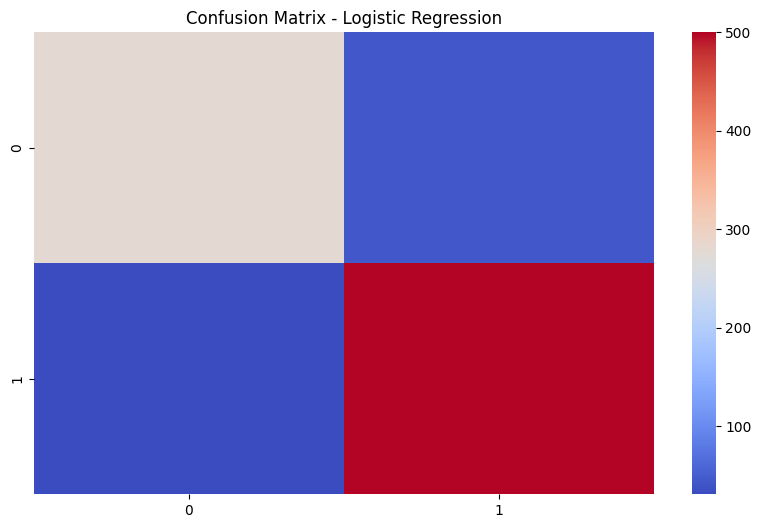

In [371]:
plt.figure(figsize=(10,6))
sns.heatmap(cm_0, cmap='coolwarm')
plt.title("Confusion Matrix - Logistic Regression-Threshold=0.5")
plt.show()


## Model Evaluation with Custom Decision Threshold(0.8)

Instead of using the default classification threshold, a higher approval threshold of 0.8 was applied to the predicted probabilities. This means that a loan application is approved only if the model is at least 80% confident. Increasing the threshold makes the model more conservative, reducing the risk of approving high-risk applicants. The resulting confusion matrix shows how stricter decision rules impact approval and rejection outcomes, highlighting the trade-off between financial risk and missed business opportunities.


In [372]:
y_proba_0=model_0.predict_proba(x_test)


In [373]:
threshold=0.8

In [374]:
y_pred_custom=np.where(y_proba_0[:,1] >= threshold,1,0)


In [375]:
cm_1=confusion_matrix(y_test,y_pred_custom)
cm_1

array([[317,   6],
       [ 79, 452]])

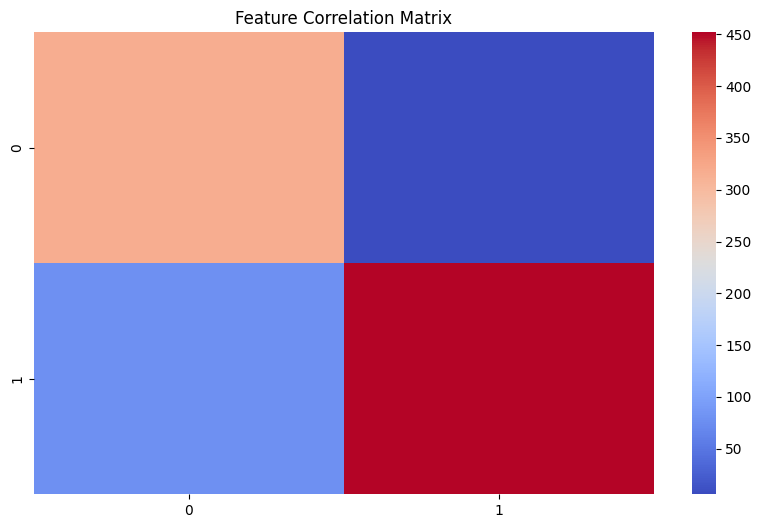

In [376]:
plt.figure(figsize=(10,6))
sns.heatmap(cm_1, cmap='coolwarm')
plt.title("Confusion Matrix - Logistic Regression-Threshold=0.8")
plt.show()

#### Accuracy Comparison Across Decision Thresholds

Model accuracy was evaluated using both the default classification threshold and a stricter threshold of 0.8. While the default threshold achieved higher overall accuracy (91.3%), increasing the threshold resulted in a slight reduction in accuracy (90.0%). This decrease occurs because stricter approval criteria lead to more conservative decisions. In credit risk modeling, a small drop in accuracy can be acceptable if it helps reduce the likelihood of approving high-risk loan applications.


In [377]:
accuracy_0=accuracy_score(y_test,y_pred)
accuracy_1=accuracy_score(y_test,y_pred_custom)
accuracy_0,accuracy_1

(0.9133489461358314, 0.9004683840749415)

#### Precision Comparison Across Decision Thresholds

Precision was used to evaluate how reliable the model’s loan approval decisions were. With the default threshold, precision was 92.1%, meaning some approved loans were still risky. When the threshold was increased to 0.8, precision improved significantly to 98.7%. This indicates that the stricter threshold greatly reduced false approvals, making the model more reliable from a financial risk perspective.


In [378]:
precision_0=precision_score(y_test,y_pred,pos_label=1)
precision_1=precision_score(y_test,y_pred_custom,pos_label=1)
precision_0,precision_1

(0.9208103130755064, 0.9868995633187773)

#### Recall Analysis for Rejected Loans

Recall was evaluated by treating loan rejection as the positive class to assess how effectively the model identifies risky applicants. With the default threshold, the model correctly identified 86.7% of rejected loans. When the threshold was increased to 0.8, recall for rejected loans improved significantly to 98.1%. This indicates that the stricter threshold greatly reduces the likelihood of approving high-risk applicants, strengthening the model’s risk control capability.


In [379]:
recall_0=recall_score(y_test,y_pred,pos_label=0)
recall_1=recall_score(y_test,y_pred_custom,pos_label=0)
recall_0,recall_1

(0.8668730650154799, 0.9814241486068112)

## Model 2 : Decision Tree

#### Decision Tree Model Training

A Decision Tree classifier was trained to compare its performance with logistic regression. Decision Trees capture non-linear relationships and use rule-based splits to make predictions. The depth of the tree was limited 5 to  reduce overfitting and improve generalization. This model provides an alternative approach to understanding loan approval decisions.


In [380]:
model_2=DecisionTreeClassifier(random_state=42,max_depth=5)
model_2.fit(x_train,y_train)
y_pred_2=model_2.predict(x_test)

In [381]:
y_proba_2=model_2.predict_proba(x_test)[:,1]


In [382]:
y_pred_2_custom=np.where(y_proba_2>=threshold,1,0)


#### Decision Tree Evaluation 

The Decision Tree model was evaluated using both the default decision threshold and a stricter threshold of 0.8. The confusion matrices show that model performance remains largely unchanged after increasing the threshold. This suggests that the Decision Tree already makes confident predictions, with most probability estimates being close to 0 or 1. As a result, adjusting the threshold has a limited impact on approval and rejection decisions for this model.


In [383]:
cm_2=confusion_matrix(y_test,y_pred_2)
cm_3=confusion_matrix(y_test,y_pred_2_custom)
cm_2,cm_3

(array([[319,   4],
        [  1, 530]]),
 array([[319,   4],
        [  2, 529]]))

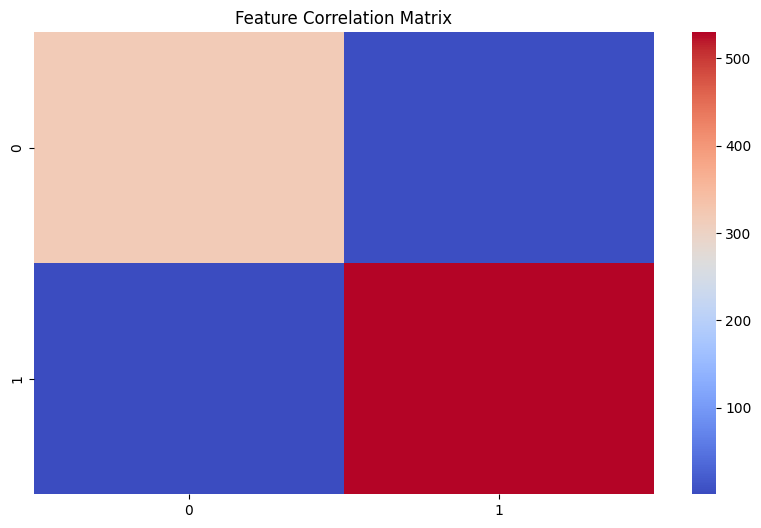

In [384]:
plt.figure(figsize=(10,6))
sns.heatmap(cm_2, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

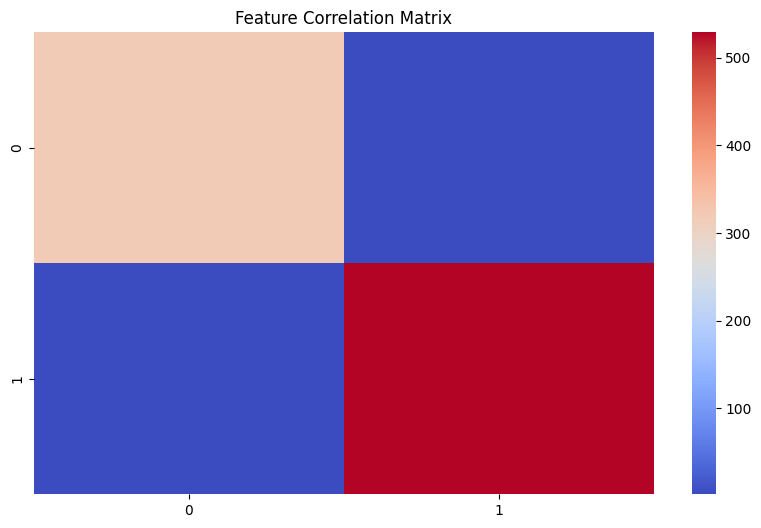

In [385]:
plt.figure(figsize=(10,6))
sns.heatmap(cm_3, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

#### Decision Tree Performance Evaluation

The Decision Tree model achieved very high performance across all evaluation metrics. Accuracy exceeded 99% under both the default and stricter decision thresholds, indicating strong overall predictive capability. Precision remained consistently high, showing that approved loan decisions were highly reliable. Recall for rejected loans also remained unchanged, demonstrating the model’s effectiveness in identifying high-risk applicants. Adjusting the decision threshold had minimal impact, suggesting that the Decision Tree already makes confident and stable predictions.


In [386]:
accuracy_2=accuracy_score(y_test,y_pred_2)
accuracy_3=accuracy_score(y_test,y_pred_2_custom)
precision_2=precision_score(y_test,y_pred_2,pos_label=1)
precision_3=precision_score(y_test,y_pred_2_custom,pos_label=1)
recall_2=recall_score(y_test,y_pred_2,pos_label=0)
recall_3=recall_score(y_test,y_pred_2_custom,pos_label=0)
print(accuracy_2,accuracy_3)
print(precision_2,precision_3)
print(recall_2,recall_3)

0.9941451990632318 0.9929742388758782
0.9925093632958801 0.9924953095684803
0.9876160990712074 0.9876160990712074


## Conclusion

This project focused on building and evaluating credit risk models to predict loan approval outcomes using applicant and loan-related features. Exploratory data analysis showed that credit score and risk-related ratios were more informative than individual financial variables such as income or loan amount. Feature engineering and proper preprocessing helped prepare the data for modeling.

Logistic regression was used as a baseline model due to its interpretability and widespread use in credit risk analysis. Adjusting the decision threshold demonstrated how business risk can be controlled by reducing false approvals, even at the cost of a slight decrease in accuracy. This highlighted the importance of evaluating models beyond accuracy alone.

A Decision Tree model was also implemented to capture non-linear relationships. It achieved very high performance across all evaluation metrics and produced stable predictions, with minimal sensitivity to threshold changes. While the Decision Tree showed superior predictive performance, logistic regression offered greater flexibility for risk-based decision control.

Overall, this project demonstrates a practical approach to credit risk modeling, combining statistical reasoning, machine learning techniques, and business-driven evaluation. The analysis emphasizes the importance of balancing predictive performance with financial risk considerations in real-world lending decisions.
